In [1]:
# !pip install twint
# !pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
import twint # To scrape through Twitter for data
import nest_asyncio # To sync twint library properly
import pandas as pd # To build datasets
import matplotlib.pyplot as plt # To build visualizations
import seaborn as sns # To also build visualizations
import re # regular expressions library, mainly for cleaning up punctuations
import spacy
nest_asyncio.apply()

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000
%matplotlib inline

In [ ]:
# Configure
config = twint.Config()
config.Search = "stimulus"
config.Limit = 10000
config.Until = "2021-03-12"
config.Store_csv = True # save as csv file
config.Output = "TweetFile.csv" # csv name

twint.run.Search(config)

In [2]:
df = pd.read_csv("TweetFile.csv")

In [3]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10098 non-null  int64  
 1   conversation_id  10098 non-null  int64  
 2   created_at       10098 non-null  object 
 3   date             10098 non-null  object 
 4   time             10098 non-null  object 
 5   timezone         10098 non-null  int64  
 6   user_id          10098 non-null  int64  
 7   username         10098 non-null  object 
 8   name             10098 non-null  object 
 9   place            1 non-null      object 
 10  tweet            10098 non-null  object 
 11  language         10098 non-null  object 
 12  mentions         10098 non-null  object 
 13  urls             10098 non-null  object 
 14  photos           10098 non-null  object 
 15  replies_count    10098 non-null  int64  
 16  retweets_count   10098 non-null  int64  
 17  likes_count 

In [5]:
df[["username", "tweet"]]

,username,tweet
0,candidate7153,"Biden administration set to issue $1,400 stimu..."
1,dudenunez,@DrAPearson @Lobodor @yedoye_ to-go box 😭😭😭😭😭😭
2,flolake,European Central Bank to Step Up Stimulus to K...
3,shadeandsun,@brad_polumbo So what you're saying is the deb...
4,kelseyspiese,Hoping that stimulus check hits the account th...
...,...,...
10093,deborahgreat1,@BlackKnight10k I'm not eligible for a stimulu...
10094,simplemandude,$WDLF this may be the last day you will ever s...
10095,kckansascity,Please say thank you at election time. Compani...
10096,nycdolfan1,Biden signs COVID-19 stimulus into law ahead o...


In [6]:
wordList = [] # List of words

# Extract words from tweets
for i in range(len(df["tweet"])):
    stringList = df["tweet"][i][0:].split(" ") # [column selected][row selected][string index]
    for j in stringList:
        wordList.append(j)

# print(wordList)            

In [7]:
# Clean up and remove punctuations
wordList = [re.sub(r'A-Za-z0-9]+', '', x) for x in wordList]

cleanedWordList = []

for word in wordList:
    if word != "":
        cleanedWordList.append(word)

# print(cleanedWordList)

In [8]:
# Stemming words to their root using SnowballStemmer

stemmer = SnowballStemmer(language = "english")

stemmedWordList = []
for word in cleanedWordList:
    stemmedWordList.append(stemmer.stem(word))

In [9]:
# Stop words removal

masterList = []

for word in stemmedWordList:
    if word not in nlp.Defaults.stop_words:
        masterList.append(word)

print(len(masterList))
print(len(stemmedWordList))
print(len(cleanedWordList))

142236
240619
240619


In [10]:
df = pd.DataFrame(masterList) # Create DataFrame for cleaned up list of words

In [11]:
dfcount = df[0].value_counts() # Create count of unique words
dfcount

stimulus                   9180
check                      3022
biden                      1497
bill                       1256
sign                       1165
                           ... 
testament                     1
como                          1
🤔🤣                            1
https://t.co/divrwfjil9       1
$130.2                        1
Name: 0, Length: 27835, dtype: int64

In [13]:
# List of top 25 words
top25 = dfcount[:25]
print(top25)

stimulus    9180
check       3022
biden       1497
bill        1256
sign        1165
tax          889
money        817
peopl        769
need         695
trillion     673
don't        638
american     631
i'm          614
$1,400       611
like         580
packag       560
vote         522
$1.9         519
bank         497
relief       496
payment      492
new          492
presid       488
account      467
covid        459
Name: 0, dtype: int64


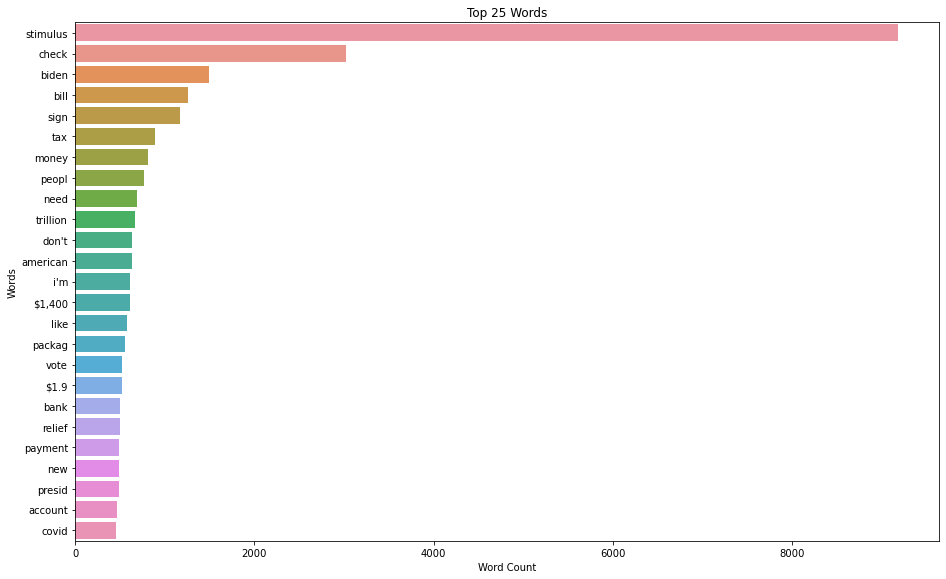

In [14]:
# Graph of top 25 words
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.8])
sns.barplot(x = top25.values, y = top25.index)
ax.set_title("Top 25 Words")
ax.set_xlabel("Word Count")
ax.set_ylabel("Words")
plt.show()

In [15]:
# Create top mentions of organizations
orgStem = " ".join(masterList)

orgStem = nlp(orgStem)

In [16]:
topOrgs = dfOrgStemCount[:20]
topOrgs

NameError: name 'dfOrgStemCount' is not defined

ValueError: min() arg is an empty sequence

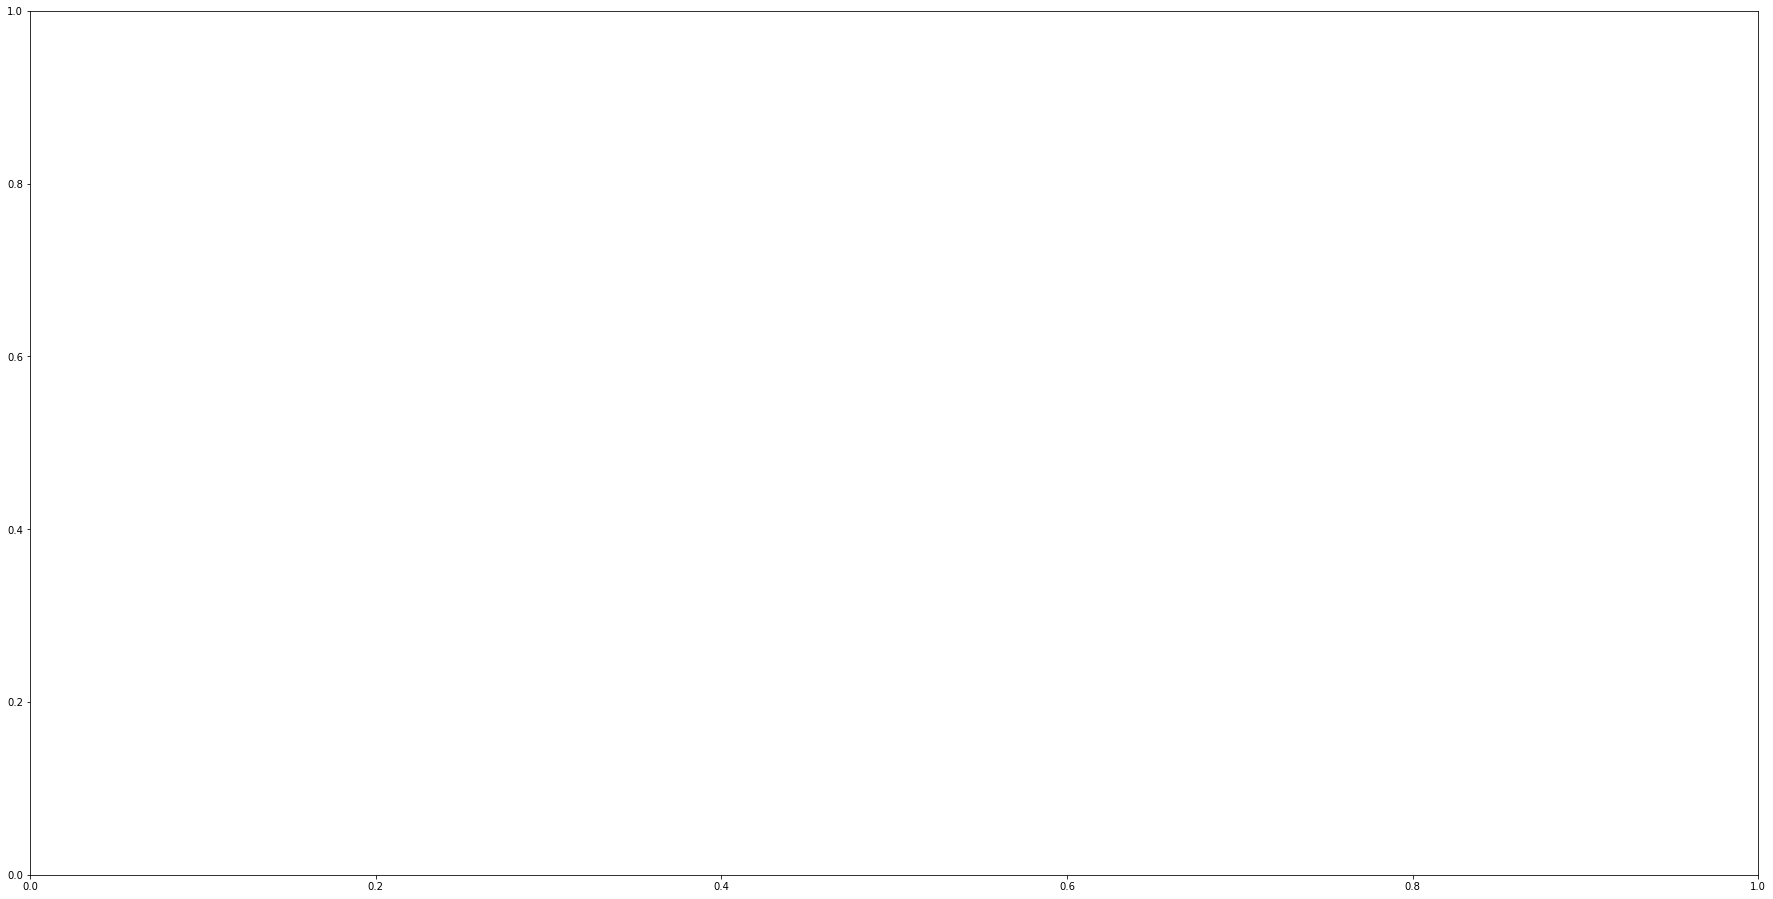

In [19]:
# Graph of top organizations
fig = plt.figure()
ax = fig.add_axes([0,0,4,3])
sns.barplot(x = topOrgs.values, y = topOrgs.index)
ax.set_title("Organizations")
ax.set_xlabel("Word Count")
ax.set_ylabel("Words")
plt.show()